In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_March23.csv


In [2]:
#1
#Kütüphanelerin Yüklenmesi

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#2
#Veri Setinin Yüklenmesi

df = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')

In [4]:
#3
#İlk 5 satırı görüntüleme

print(df.head())

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

In [5]:
#4
#Veri seti hakkında genel bilgi

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [6]:
#5
#Sütunlardaki eksik veri sayısı

print(df.isnull().sum())

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [7]:
#6
#Temel istatistiksel özet

print(df.describe())

           Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  7.728394e+06  7.728394e+06  7.728394e+06  4.325632e+06  4.325632e+06   
mean   2.212384e+00  3.620119e+01 -9.470255e+01  3.626183e+01 -9.572557e+01   
std    4.875313e-01  5.076079e+00  1.739176e+01  5.272905e+00  1.810793e+01   
min    1.000000e+00  2.455480e+01 -1.246238e+02  2.456601e+01 -1.245457e+02   
25%    2.000000e+00  3.339963e+01 -1.172194e+02  3.346207e+01 -1.177543e+02   
50%    2.000000e+00  3.582397e+01 -8.776662e+01  3.618349e+01 -8.802789e+01   
75%    2.000000e+00  4.008496e+01 -8.035368e+01  4.017892e+01 -8.024709e+01   
max    4.000000e+00  4.900220e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)  Temperature(F)  Wind_Chill(F)   Humidity(%)  \
count  7.728394e+06    7.564541e+06   5.729375e+06  7.554250e+06   
mean   5.618423e-01    6.166329e+01   5.825105e+01  6.483104e+01   
std    1.776811e+00    1.901365e+01   2.238983e+01  2.282097e+01   
min    0.000000e

In [8]:
#7
#Eksik veri oranlarının hesaplanması

missing_values = df.isnull().sum() / len(df) * 100
print(missing_values[missing_values > 0].sort_values(ascending=False))

End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Sunrise_Sunset            0.300787
Civil_Twilight            0.300787
Nautical_Twilight         0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
dtype: float64


In [12]:
#8
#Eksik Verisi Yüksek Sütunları Düşürme

df_cleaned = df.drop(columns=['End_Lat', 'End_Lng', 'Precipitation(in)', 'Wind_Chill(F)'])

In [13]:
#9
#Temizlenmiş veri setinin kontrolü

print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 42 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   Distance(mi)           float64
 8   Description            object 
 9   Street                 object 
 10  City                   object 
 11  County                 object 
 12  State                  object 
 13  Zipcode                object 
 14  Country                object 
 15  Timezone               object 
 16  Airport_Code           object 
 17  Weather_Timestamp      object 
 18  Temperature(F)         float64
 19  Humidity(%)            float64
 20  Pressure(in)           float64
 21  Visibility(mi)         float64
 22  Wind_Direction    

In [14]:
#10
#Gerekli kütüphaneleri yeniden yüklemek

import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
#11
#Grafikler için genel tema

sns.set(style="whitegrid")

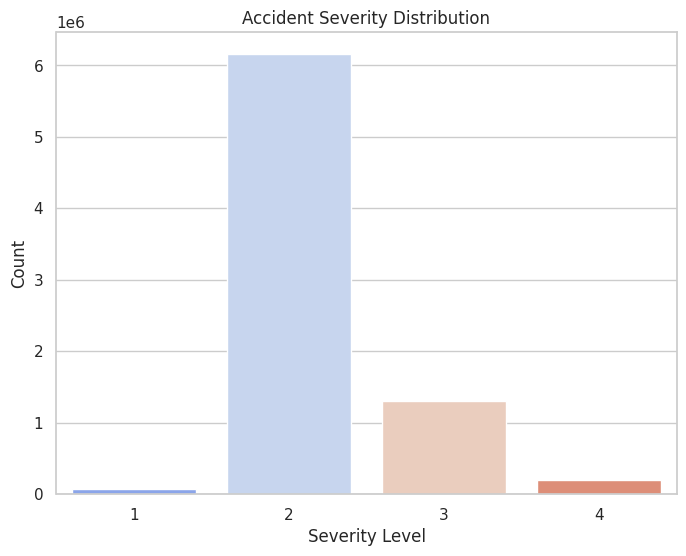

In [17]:
#12
#Kaza şiddeti dağılımının görselleştirme

plt.figure(figsize=(8, 6))
sns.countplot(x='Severity', data=df_cleaned, palette='coolwarm')
plt.title('Accident Severity Distribution')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.show()

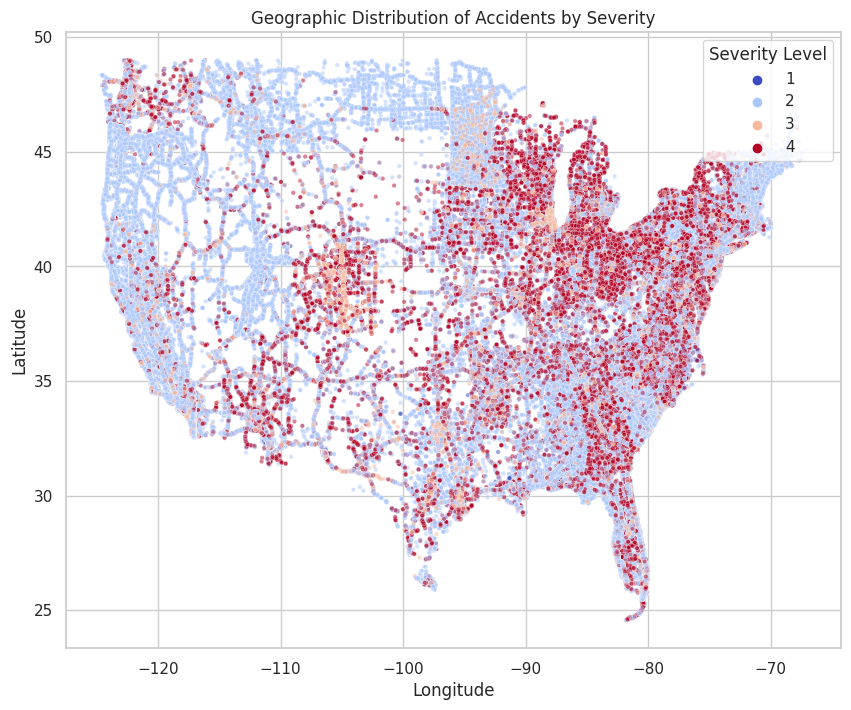

In [18]:
#13
#Kazaların coğrafi dağılımını görselleştirme

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Start_Lng', y='Start_Lat', hue='Severity', data=df_cleaned, palette='coolwarm', s=10, alpha=0.5)
plt.title('Geographic Distribution of Accidents by Severity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Severity Level', loc='upper right')
plt.show()

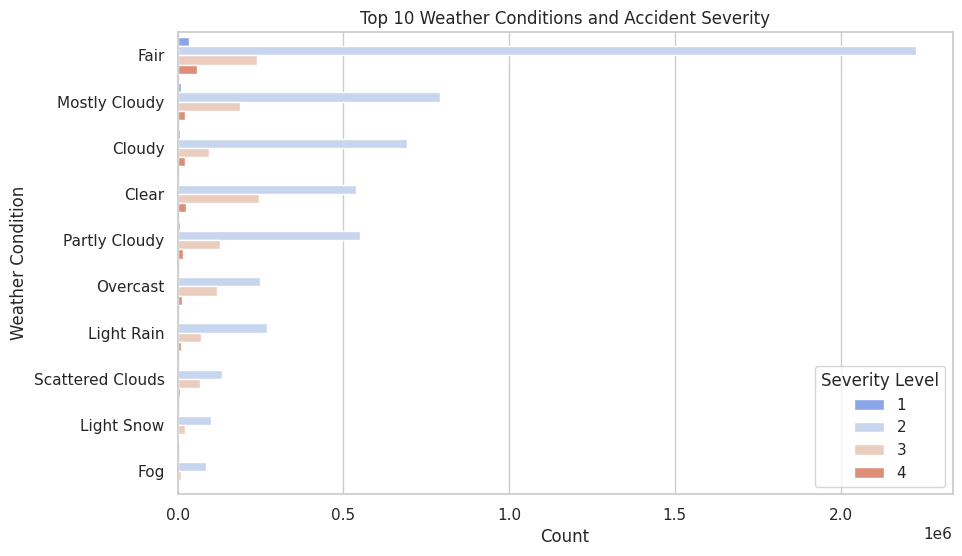

In [33]:
#14
#Hava koşullarına göre kaza dağılımının görselleştirilmesi

plt.figure(figsize=(10, 6))
sns.countplot(y='Weather_Condition', hue='Severity', data=df_cleaned, palette='coolwarm', order=df_cleaned['Weather_Condition'].value_counts().index[:10])
plt.title('Top 10 Weather Conditions and Accident Severity')
plt.xlabel('Count')
plt.ylabel('Weather Condition')
plt.legend(title='Severity Level')
plt.show()

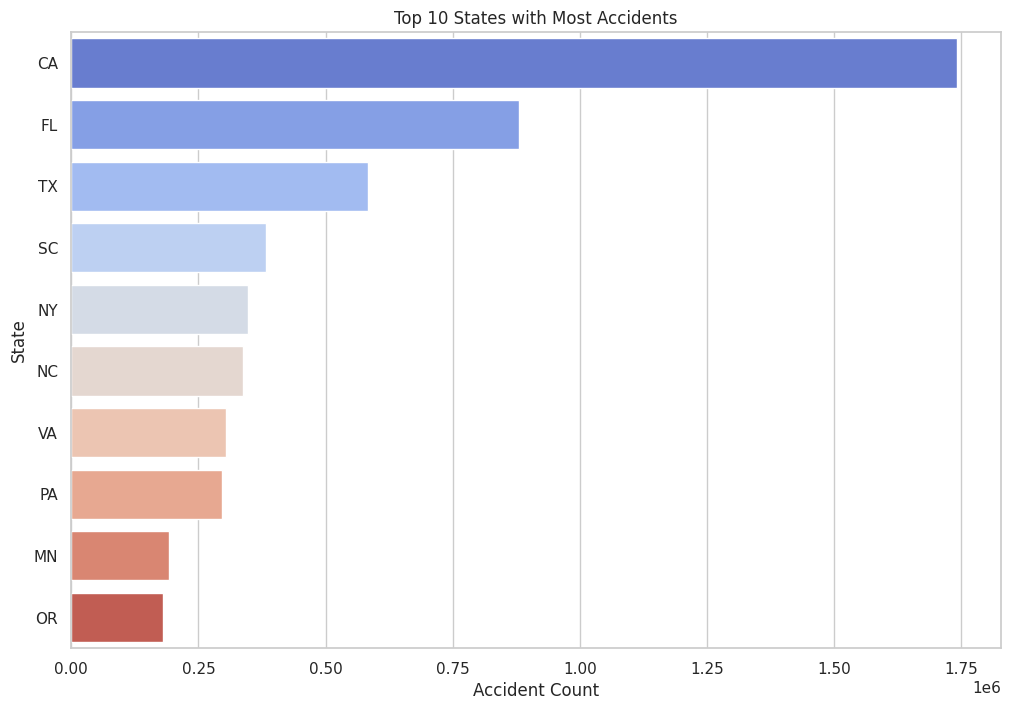

In [35]:
#15
#Eyaletlere göre kaaza dağılımının görselleştirilmesi

plt.figure(figsize=(12, 8))
top_states = df_cleaned['State'].value_counts().nlargest(10)  # İlk 10 eyalet
sns.barplot(x=top_states.values, y=top_states.index, palette='coolwarm')
plt.title('Top 10 States with Most Accidents')
plt.xlabel('Accident Count')
plt.ylabel('State')
plt.show()

In [42]:
#16
#Sayısal Sütunların Ölçeklenmesi ve Normalizasyonu

from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

In [ ]:
#17
#Güncellenmiş sayısal sütunların listesi

numerical_columns = ['Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Wind_Speed(mph)', 'Pressure(in)']

In [ ]:
#18
#Verileri seçme

X_numerical = df_cleaned[numerical_columns]

In [ ]:
#19
#Standard Scaler ile standartlaştırma

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)

In [ ]:
#20
#Min-Max Scaler ile normalizasyon

min_max_scaler = MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X_numerical)

In [ ]:
#21
#Verilere dönüştürülmüş halleri ekleme

scaled_columns = [col + '_scaled' for col in numerical_columns]
normalized_columns = [col + '_normalized' for col in numerical_columns]

df_cleaned[scaled_columns] = pd.DataFrame(X_scaled, columns=scaled_columns, index=df_cleaned.index)
df_cleaned[normalized_columns] = pd.DataFrame(X_normalized, columns=normalized_columns, index=df_cleaned.index)

In [44]:
#22
#Özellikler ve Hedef Değişkenlerin Ayrılması
#Güncellenmiş sayısal sütunların listesi

numerical_columns = ['Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Wind_Speed(mph)', 'Pressure(in)']

In [ ]:
#23
#Standard Scaler ve Min-Max Scaler ile oluşturulan sütunların isimleri

scaled_columns = [col + '_scaled' for col in numerical_columns]
normalized_columns = [col + '_normalized' for col in numerical_columns]

In [ ]:
#24
# Özellikler ve hedef değişkeni ayırma

X = df_cleaned[scaled_columns]  # Ölçeklenmiş özellikler
y = df_cleaned['Severity']  # Hedef değişkeni (örneğin, kaza şiddeti)

In [ ]:
#25
#Eğitim ve test kümelerine ayırma

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
#26
#Eksik Değerleri Doldurma ve Veri Standartlaştırma

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [56]:
#27
#Veri setini tekrar yükleme

data = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')

In [57]:
#28
#Özellikleri seçme

X = data[['Distance(mi)', 'Pressure(in)', 'Temperature(F)']]
y = data['Severity']  # Örnek hedef değişken; veri setinde uygun bir hedef değişken belirleme

In [58]:
#29
#Eksik değerleri doldurma

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [59]:
#30
#Özellikleri ölçeklendirme

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [60]:
#31
#Eğitim ve test setlerine ayırma

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [65]:
#32
#Logistic Regression modelini oluşturma ve model eğitimi

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [62]:
#33
#Modeli test ediyoruz

y_pred = model.predict(X_test)

In [63]:
#34
# Ve Model performansını değerlendiriyoruz

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00     20255
           2       0.80      1.00      0.89   1846123
           3       0.10      0.00      0.00    390707
           4       0.17      0.00      0.00     61434

    accuracy                           0.80   2318519
   macro avg       0.27      0.25      0.22   2318519
weighted avg       0.65      0.80      0.71   2318519

